# Assignment 3

The following assignment is going to cover lectures 9, 10, 11 & 12.

## Broad Topics are

- Trajectory Optimization
- Motion Planning
- Visuomotor Policy
- Task & Motion Planning

# Maximum Marks possible: [$60 = 20 + 20 + 20$]
If individual marks for a subpart are not specified assume equal marks for all the subparts within that section.

## How to Answer ?:
For theoretical questions make a markdown cell below each question/question-subpart and write the answer there. (yes handwritten solutions are allowed too but you need to be careful while linking it)
For coding questions write the answer at the designated position indicated by the question.

## Submission:
You have to submit the file assignment_3.ipynb with your answers into Moodle.

# Question 1 [Full Marks $20 = 10 + 10$]

## Subtask 1: Trajectory optimization [Marks = $10$]

A mobile robot moves in 1D along the x-axis. The robot's motion follows the **discrete-time dynamics**:

$$
\begin{aligned}
x_{t+1} = x_t + v_t \cdot Δt \\
v_{t+1} = v_t + u_t \cdot Δt
\end{aligned}
$$

Where:
- $x_t$ is the position,
- $v_t$ is the velocity,
- $u_t$ is the control input (acceleration),
- $Δt$ is the time step.

The objective is to compute an **optimal trajectory** from an initial state
$(𝑥_0, 𝑣_0)$ to a final state $(x_f, v_f)$ over a fixed horizon $𝑇$, while **minimizing control effort**:
$$
\begin{aligned}
J = \sum^{T-1}_{t=0}u^2_t
\end{aligned}
$$

subject to:
- Control limits: $u_{\min} \leq u_t \leq u_{\max}$,
- State constraints (optional): $x_{\min} \leq x_t \leq x_{\max}$.

### Subquestion 1 [Marks = $2$]:

Write down the full optimization problem, including:
- Objective function,
- State transition equations,
- Constraints on control and state.

#### ***Answer 1***:

##### 

##### 


We aim to solve the following optimization problem:


\begin{aligned}
Objective Function

\min_{\{u_t\}_{t=0}^{T-1},\,\{x_t\}_{t=0}^{T},\,\{v_t\}_{t=0}^{T}} \quad & J = \sum_{t=0}^{T-1} u_t^2 \\

\text{State Transition Equations (Dynamics)} \\
& x_{t+1} = x_t + v_t\, \Delta t, \quad t=0,\ldots,T-1, \\
& v_{t+1} = v_t + u_t\, \Delta t, \quad t=0,\ldots,T-1, \\
\text{Constraints on control and state} \\
& u_{\min} \leq u_t \leq u_{\max}, \quad t=0,\ldots,T-1, \\
& x_{\min} \leq x_t \leq x_{\max}, \quad t=0,\ldots,T, \\
& x_0 = x_{\text{init}}, \quad v_0 = v_{\text{init}}, \\
& x_T = x_f, \quad v_T = v_f.
\end{aligned}








### Subquestion 2 [Marks = $2$]:

What does minimizing $J$ achieve in terms of the robot's motion?

### Answer 2: 
Minimizing J ensures minimal control effort over the trajectory

### Subquestion 3 [Marks = $2$]:

Suppose the optimization returns a control sequence $u_t$ that oscillates significantly. What could be causing this, and how can it be fixed?

### Answer 3:

Add another cost term to J which penalises big changes in $u_t+1$ and $u_t$.
Like, basicallly a reguliser
$$
\begin{aligned}
J = \sum^{T-1}_{t=0}u^2_t + \sum^{T-2}_{t=0} (u_{t+1} - u_t)^2
\end{aligned}
$$

### Subquestion 4 [Marks = $4$]:

Add the code based on the provided instructions.

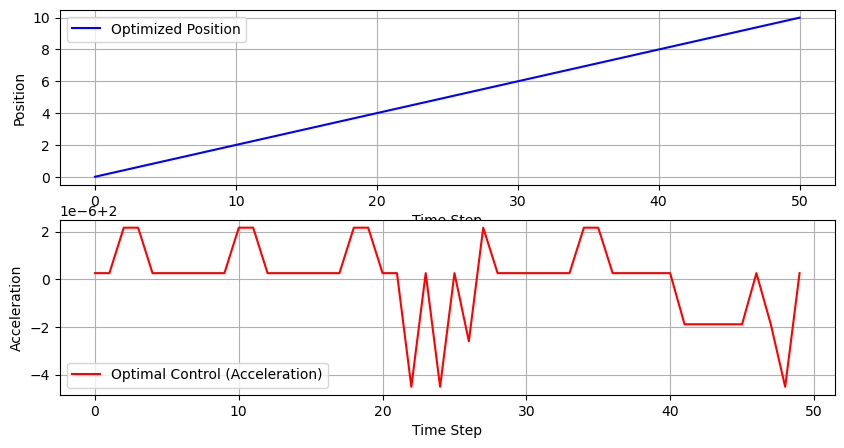

Final optimized position: 9.999999999998488


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the cost function for a simple trajectory optimization
# Minimize the total squared acceleration (smooth trajectory)
def trajectory_cost(u, x0, xf, T, dt):
    
    #####################TODO(Start)########################
    cost = np.sum(u**2) 
    #####################TODO(End)########################

    return cost

# Define constraints (initial and final position)
def constraint(u, x0, xf, T, dt):
    x = np.zeros(T+1)
    x[0] = x0

    #####################TODO(Start)########################
    for t in range(T):
        x[t+1] = x[t] + u[t]*dt
    #####################TODO(End)########################

    return x[-1] - xf  # Ensure final position is met

# Parameters
T = 50  # Number of time steps
dt = 0.1  # Time step size
x0 = 0   # Initial position
xf = 10  # Final position

# Initial guess for control inputs (acceleration)
u0 = np.zeros(T)

# Optimization
constraints = ({'type': 'eq', 'fun': constraint, 'args': (x0, xf, T, dt)})
res = minimize(trajectory_cost, u0, args=(x0, xf, T, dt), constraints=constraints, method='SLSQP')

# Extract optimal control and trajectory
u_opt = res.x
x_opt = np.zeros(T+1)
x_opt[0] = x0
for t in range(T):
    x_opt[t+1] = x_opt[t] + u_opt[t] * dt

# Plot results
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(x_opt, label='Optimized Position', color='blue')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(u_opt, label='Optimal Control (Acceleration)', color='red')
plt.xlabel('Time Step')
plt.ylabel('Acceleration')
plt.legend()
plt.grid()

plt.show()

print("Final optimized position:", x_opt[-1])


## Subtask 2: Visuomotor policy [Marks = $10$]

We will implemente a "Reach" Environment in Gym style. The assignment is structured in steps, requiring students to write functions to define the environment and simulate it.

**Step 1: Setting Up the Environment**


In [ ]:
## Install Dependencies as mentioned in the README.md

**Step 2: Creating the Environment**

In [ ]:
from typing import Any, Dict

import numpy as np

from panda_gym.envs.core import Task
from panda_gym.utils import distance


class Reach(Task):
    def __init__(
        self,
        sim,
        get_ee_position,
        reward_type="sparse",
        distance_threshold=0.05,
        goal_range=0.3,
    ) -> None:
        super().__init__(sim)
        self.reward_type = reward_type
        self.distance_threshold = distance_threshold
        self.get_ee_position = get_ee_position
        self.goal_range_low = np.array([-goal_range / 2, -goal_range / 2, 0])
        self.goal_range_high = np.array([goal_range / 2, goal_range / 2, goal_range])
        with self.sim.no_rendering():
            self._create_scene()

    def _create_scene(self) -> None:
        self.sim.create_plane(z_offset=-0.4)
        self.sim.create_table(length=1.1, width=0.7, height=0.4, x_offset=-0.3)
        self.sim.create_sphere(
            body_name="target",
            radius=0.02,
            mass=0.0,
            ghost=True,
            position=np.zeros(3),
            rgba_color=np.array([0.1, 0.9, 0.1, 0.3]),
        )

    def get_obs(self) -> np.ndarray:
        return np.array([])  # no task-specific observation

    def get_achieved_goal(self) -> np.ndarray:
        ee_position = np.array(self.get_ee_position())
        return ee_position

    def reset(self) -> None:
        self.goal = self._sample_goal()
        self.sim.set_base_pose("target", self.goal, np.array([0.0, 0.0, 0.0, 1.0]))

    def _sample_goal(self) -> np.ndarray:
        """Randomize goal."""
        #####################TODO(Start)########################

        #####################TODO(End)########################
        return goal

    def is_success(self, achieved_goal: np.ndarray, desired_goal: np.ndarray, info: Dict[str, Any] = {}) -> np.ndarray:
        """Use distance function from Panda gym to compute success if the distance betweenn achieved goal and desired goal is smaller than the threshold"""
        #####################TODO(Start)########################

        #####################TODO(End)########################


    def compute_reward(self, achieved_goal: np.ndarray, desired_goal: np.ndarray, info: Dict[str, Any] = {}) -> np.ndarray:
        d = distance(achieved_goal, desired_goal)
        if self.reward_type == "sparse":
            return -np.array(d > self.distance_threshold, dtype=np.float32)
        else:
            return -d.astype(np.float32)

**Step 3: Wrapping the environment**

In [ ]:
from typing import Optional

import numpy as np

from panda_gym.envs.core import RobotTaskEnv
from panda_gym.envs.robots.panda import Panda
from panda_gym.pybullet import PyBullet


class PandaReachEnv(RobotTaskEnv):
    """Reach task wih Panda robot.

    Args:
        render_mode (str, optional): Render mode. Defaults to "rgb_array".
        reward_type (str, optional): "sparse" or "dense". Defaults to "sparse".
        control_type (str, optional): "ee" to control end-effector position or "joints" to control joint values.
            Defaults to "ee".
        renderer (str, optional): Renderer, either "Tiny" or OpenGL". Defaults to "Tiny" if render mode is "human"
            and "OpenGL" if render mode is "rgb_array". Only "OpenGL" is available for human render mode.
        render_width (int, optional): Image width. Defaults to 720.
        render_height (int, optional): Image height. Defaults to 480.
        render_target_position (np.ndarray, optional): Camera targeting this position, as (x, y, z).
            Defaults to [0., 0., 0.].
        render_distance (float, optional): Distance of the camera. Defaults to 1.4.
        render_yaw (float, optional): Yaw of the camera. Defaults to 45.
        render_pitch (float, optional): Pitch of the camera. Defaults to -30.
        render_roll (int, optional): Roll of the camera. Defaults to 0.
    """

    def __init__(
        self,
        render_mode: str = "rgb_array",
        reward_type: str = "sparse",
        control_type: str = "ee",
        renderer: str = "Tiny",
        render_width: int = 720,
        render_height: int = 480,
        render_target_position: Optional[np.ndarray] = None,
        render_distance: float = 1.4,
        render_yaw: float = 45,
        render_pitch: float = -30,
        render_roll: float = 0,
    ) -> None:
        sim = PyBullet(render_mode=render_mode, renderer=renderer)
        robot = Panda(sim, block_gripper=True, base_position=np.array([-0.6, 0.0, 0.0]), control_type=control_type)
        task = Reach(sim, reward_type=reward_type, get_ee_position=robot.get_ee_position)
        super().__init__(
            robot,
            task,
            render_width=render_width,
            render_height=render_height,
            render_target_position=render_target_position,
            render_distance=render_distance,
            render_yaw=render_yaw,
            render_pitch=render_pitch,
            render_roll=render_roll,
        )

**Step 4: Running the simulation loop**

In [ ]:
env = PandaReachEnv()
observation, info = env.reset()

images = [env.render()]
for _ in range(200):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    images.append(env.render())

    if terminated or truncated:
        observation, info = env.reset()
        images.append(env.render())

env.close()

**Step 5: Rendering the video**

In [ ]:
from numpngw import write_apng

write_apng("anim.png", images, delay=40)  # real-time rendering = 40 ms between frames

In [ ]:
from IPython.display import Image

Image(filename="anim.png")

# Question 2 [Full Marks $20 = 3 + 7 + 10$]

In the following question we will implement an RRT and improve upon it by implementing another variant of it called RRT*

Let's start with loading our maze generator for creating arbitrary mazes in the scene where we can test our algorithm.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from maze_generator import MazeGenerator

You can run the cell below again and again to see new start and goal configurations

Start position: (63.407173241808636, 83.95221252308092)
Goal position: (47.81640940269517, 16.254413026677568)


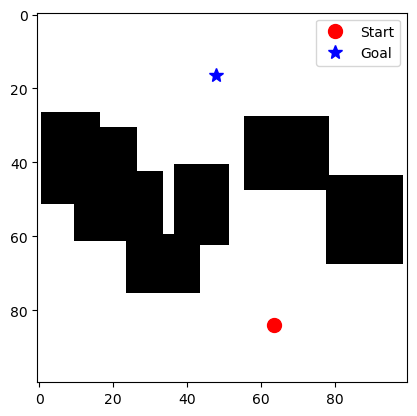

In [2]:
# Creating a maze generator instance with specified parameters
# - width and height: size of the maze (100x100)
# - obstacle_density: Almost 30% of cells will be obstacles
# - safety_distance: minimum distance between obstacles (2 units)
maze_generator = MazeGenerator(
    width=100, height=100, obstacle_density=0.3, safety_distance=2
    )

# Generate the maze which returns a tuple containing:
# 1. The maze array (100x100 where 0 represents free space, 1 represents obstacles)
# 2. Start position coordinates
# 3. Goal position coordinates
maze, start, goal = maze_generator.generate()

print("Start position:", start)
print("Goal position:", goal)
orig_map = matplotlib.colormaps['gray']
plt.imshow(maze, cmap=orig_map.reversed())
plt.plot(start[0], start[1], 'ro', markersize=10, label='Start')
plt.plot(goal[0], goal[1], 'b*', markersize=10, label='Goal')
plt.legend()
plt.show()

## Subtask 1: [Marks = $3$]

Let's create an imaginary vehicle whose dynamics we will be using for our task.

Assume:
- The vehicle is restricted to the 2D grid.
- At each step you have 9 unique directions to travel in 45 degree intervals : (0, 45, 90, 135, 180, 225, 270, 315)
- Assume the vehicle can move in an omni-directional manner hence facing direction is not important

`Complete the Code Below:`

In [ ]:
import numpy as np
from typing import Tuple, List
import math


class SimpleCar:
    def __init__(self, step_size: float = 1.0):
        self.step_size = step_size
        self.possible_thetas = []
        # Create the possible 9 directions
        #####################TODO(Start)########################
        # 8 directions in 45-degree increments (0, 45, 90, 135, 180, 225, 270, 315)

        
        #####################TODO(End)########################
        print(self.possible_thetas)

    def get_next_states(self, x: float, y: float) -> List[Tuple[float, float]]:
        """Generate possible next states in 45-degree increments"""
        next_states = []

        # Create each possible next state from the state (x, y)
        #####################TODO(Start)########################

        #####################TODO(End)########################
        return next_states

Now we will start constructing the RRT Class

In [ ]:
import random
from typing import Optional

In [ ]:
class Node:
    """A class representing a node in 2D space with coordinates and parent reference.

    Attributes:
        x (float): The x-coordinate of the node in 2D space
        y (float): The y-coordinate of the node in 2D space
        parent (Node, optional): Reference to parent node, defaults to None

    Methods:
        __str__: Returns string representation of node coordinates
    """
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y
        self.parent = None

    def __str__(self):
        return f"({self.x}, {self.y})"

## Subtask 2 [Marks = $7$]

For the RRT Class below we will be completing two functions:

- `extend(self, from_node: Node, to_node: Node)`
    - It extends the path from a given node towards a target node using the car's movement constraints.
    - It evaluates all possible next states and selects the one that minimizes the Euclidean distance between from and to node.
    - Return None if no valid next node is found.
- `plan(self)`
    - It plans a path from start to goal using RRT (Rapidly-exploring Random Tree) algorithm.
    - It keeps track of the best path found so far based on cost
    - A path is considered to reach the goal if it comes within step_size distance

`Complete the Code Below:`

Note: You are allowed to use any utility functions defined within this class

In [ ]:
class RRT:
    """A class implementing the Rapidly-exploring Random Tree (RRT) path planning algorithm.

    This implementation includes support for kinematic car constraints and obstacle avoidance
    with safety distances.

    Attributes:
        maze_generator (MazeGenerator): Generator object that defines the maze/environment
        car_path (SimpleCar): Object defining car movement constraints
        start (Node): Starting position node
        goal (Node): Goal position node
        nodes (List[Node]): List of all nodes in the tree
        max_iterations (int): Maximum number of iterations for path planning
        goal_sample_rate (float): Probability of sampling the goal position
        safety_distance (float): Minimum required distance from obstacles
        continue_flag (bool): Whether to continue searching after finding first path

    Args:
        maze_generator (MazeGenerator): Environment generator object
        car_path (SimpleCar): Car movement constraints object
        start (Tuple[float, float]): Start coordinates (x,y)
        goal (Tuple[float, float]): Goal coordinates (x,y)
        max_iterations (int, optional): Maximum iterations. Defaults to 5000
        goal_sample_rate (float, optional): Goal sampling probability. Defaults to 0.1
        safety_distance (float, optional): Obstacle clearance. Defaults to 5.0
        continue_flag (bool, optional): Continue after first path. Defaults to False
    """
    def __init__(
        self,
        maze_generator: MazeGenerator,
        car_path: SimpleCar,
        start: Tuple[float, float],
        goal: Tuple[float, float],
        max_iterations: int = 5000,
        goal_sample_rate: float = 0.1,
        safety_distance: float = 5.0,
        continue_flag: bool = False
    ):
        self.maze_generator = maze_generator
        self.car_path = car_path
        self.start = Node(start[0], start[1])
        self.goal = Node(goal[0], goal[1])
        self.nodes = [self.start]
        self.max_iterations = max_iterations
        self.goal_sample_rate = goal_sample_rate
        self.safety_distance = safety_distance
        self.continue_flag = continue_flag

    def get_random_point(self) -> Node:
        if random.random() < self.goal_sample_rate:
            return Node(self.goal.x, self.goal.y)
        return Node(
            random.uniform(0, self.maze_generator.width),
            random.uniform(0, self.maze_generator.height),
        )

    def get_node_cost(self, node: Node) -> float:
        """Calculate cost to reach a node from start"""
        cost = 0.0
        current = node
        while current.parent is not None:
            cost += np.sqrt(
                (current.x - current.parent.x) ** 2
                + (current.y - current.parent.y) ** 2
            )
            current = current.parent
        return cost

    def check_safety_distance(self, x: float, y: float) -> bool:
        """Check if a point maintains safe distance from obstacles"""
        # Check points in a circle around (x,y)
        for dx in np.linspace(-self.safety_distance, self.safety_distance, 8):
            for dy in np.linspace(-self.safety_distance, self.safety_distance, 8):
                check_x = x + dx
                check_y = y + dy
                # If point is within safety distance of obstacle, return False
                if not self.maze_generator.is_position_valid(check_x, check_y):
                    return False
        return True

    def get_nearest_node(self, point: Node) -> Node:
        distances = [
            (node.x - point.x) ** 2 + (node.y - point.y) ** 2 for node in self.nodes
        ]
        return self.nodes[distances.index(min(distances))]

    def is_path_valid(self, from_node: Node, to_state: Tuple[float, float]) -> bool:
        x, y = to_state
        if not self.maze_generator.is_position_valid(x, y):
            return False

        if not self.check_safety_distance(x, y):
            return False

        # we must also check if the entire path between from and to is valid
        steps = 5  # Number of intermediate points to check
        for i in range(steps):
            t = i / steps
            check_x = from_node.x + t * (x - from_node.x)
            check_y = from_node.y + t * (y - from_node.y)

            if not self.maze_generator.is_position_valid(check_x, check_y):
                return False
            if not self.check_safety_distance(check_x, check_y):
                return False

        return True

    def extend(self, from_node: Node, to_node: Node) -> Optional[Node]:
        """
        Extends the path from a given node towards a target node using the car's movement constraints.

        Args:
            from_node (Node): The starting node from which to extend the path
            to_node (Node): The target node towards which the path should be extended

        Returns:
            Optional[Node]: A new node representing the best next state if found, None if no valid
                           extension is possible
        """
        best_dist = 10000000
        best_state = None

        #####################TODO(Start)########################

        #####################TODO(End)########################

        return new_node

    def plan(self) -> List[Node]:
        """Plan a path from start to goal using RRT (Rapidly-exploring Random Tree) algorithm.

        This method implements an RRT path planning algorithm that attempts to find a path from
        the start position to the goal position. It iteratively builds a tree by:
        1. Sampling random points in the configuration space
        2. Finding the nearest node in the existing tree
        3. Extending the tree towards the random point
        4. Checking if the goal is reachable from the new node

        Args:
            None

        Returns:
            List[Node]: A list of nodes representing the best path found from start to goal.
                        Returns empty list if no path is found.
        """
        best_path = []
        best_cost = 10000000
        for i in range(self.max_iterations):

            # Sample a random point
            # Find the nearest node in the Tree
            # Extend the tree towards the random point
            #####################TODO(Start)########################

            #####################TODO(End)########################

            if new_node is not None:
                self.nodes.append(new_node)

                # Check if we're close to the goal
                # Compute the cost from this goal node to the start
                #####################TODO(Start)########################
               
                #####################TODO(End)########################
                    if current_cost < best_cost:
                        best_cost = current_cost
                        best_path = self.get_path(new_node)
                        print(f"New best path found! Cost: {best_cost:.2f}")

                    if not self.continue_flag:
                        break

        if best_path:
            print(f"Planning complete! Best path cost: {best_cost:.2f}")
            return best_path
        else:
            print("No path found!")
            return []

    def get_path(self, end_node: Node) -> List[Node]:
        path = []
        current = end_node
        while current is not None:
            path.append(current)
            current = current.parent
        return path[::-1]

In [ ]:
maze_generator = MazeGenerator(
        width=100, height=100, obstacle_density=0.3, safety_distance=2)

car = SimpleCar(step_size=1.0)

# Define start and goal
maze, start, goal = maze_generator.generate()

# Create and run RRT
rrt = RRT(
    maze_generator,
    car,
    start,
    goal,
    max_iterations=2000,
    goal_sample_rate=0.1,
    safety_distance=0.5,
    continue_flag=False
)

path_rrt = rrt.plan()

### The below visualization function will help us in seeing how the paths look along with the tree.

In [ ]:
def visualize_result(
    maze: np.ndarray,
    rrt: RRT,
    path_rrt: list,
    rrt_star: Optional[RRT] = None,
    path_rrt_star: Optional[list] = None,
):
    if rrt_star is None and path_rrt_star is None:
        # Only RRT case
        fig, ax = plt.subplots(figsize=(8, 8))

        rrt_cost = (
            sum(
                np.sqrt(
                    (path_rrt[i].x - path_rrt[i - 1].x) ** 2
                    + (path_rrt[i].y - path_rrt[i - 1].y) ** 2
                )
                for i in range(1, len(path_rrt))
            )
            if path_rrt
            else float("inf")
        )

        # RRT Plot
        ax.imshow(maze, cmap="Greys")

        # Plot RRT exploration tree
        for node in rrt.nodes:
            if node.parent is not None:
                ax.plot(
                    [node.parent.x, node.x],
                    [node.parent.y, node.y],
                    color="green",
                    linewidth=3.5,
                    alpha=0.7,
                    zorder=1,
                )

        # Plot RRT path
        if path_rrt:
            path_x = [node.x for node in path_rrt]
            path_y = [node.y for node in path_rrt]
            ax.plot(
                path_x,
                path_y,
                color="lime",
                linewidth=6,
                linestyle="-",
                zorder=2,
                label="Path",
            )

        # Plot start and goal
        ax.plot(
            rrt.start.x,
            rrt.start.y,
            marker="o",
            color="blue",
            markersize=15,
            label="Start",
            zorder=3,
        )
        ax.plot(
            rrt.goal.x,
            rrt.goal.y,
            marker="*",
            color="red",
            markersize=20,
            label="Goal",
            zorder=3,
        )

        ax.set_title(f"RRT Path Planning\nPath Cost: {rrt_cost:.2f}", fontsize=16, pad=20)
        ax.legend(fontsize=12, loc="upper right")
        ax.grid(True, alpha=0.3)
        ax.set_xticks([])
        ax.set_yticks([])

    else:
        # Both RRT and RRT* case
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

        rrt_cost = (
            sum(
                np.sqrt(
                    (path_rrt[i].x - path_rrt[i - 1].x) ** 2
                    + (path_rrt[i].y - path_rrt[i - 1].y) ** 2
                )
                for i in range(1, len(path_rrt))
            )
            if path_rrt
            else float("inf")
        )

        rrt_star_cost = (
            sum(
                np.sqrt(
                    (path_rrt_star[i].x - path_rrt_star[i - 1].x) ** 2
                    + (path_rrt_star[i].y - path_rrt_star[i - 1].y) ** 2
                )
                for i in range(1, len(path_rrt_star))
            )
            if path_rrt_star
            else float("inf")
        )

        # RRT Plot
        ax1.imshow(maze, cmap="Greys")
        for node in rrt.nodes:
            if node.parent is not None:
                ax1.plot(
                    [node.parent.x, node.x],
                    [node.parent.y, node.y],
                    color="green",
                    linewidth=3.5,
                    alpha=0.7,
                    zorder=1,
                )

        if path_rrt:
            path_x = [node.x for node in path_rrt]
            path_y = [node.y for node in path_rrt]
            ax1.plot(
                path_x,
                path_y,
                color="lime",
                linewidth=6,
                linestyle="-",
                zorder=2,
                label="Path",
            )

        ax1.plot(
            rrt.start.x,
            rrt.start.y,
            marker="o",
            color="blue",
            markersize=15,
            label="Start",
            zorder=3,
        )
        ax1.plot(
            rrt.goal.x,
            rrt.goal.y,
            marker="*",
            color="red",
            markersize=20,
            label="Goal",
            zorder=3,
        )

        # RRT* Plot
        ax2.imshow(maze, cmap="Greys")
        for node in rrt_star.nodes:
            if node.parent is not None:
                ax2.plot(
                    [node.parent.x, node.x],
                    [node.parent.y, node.y],
                    color="green",
                    linewidth=3.5,
                    alpha=0.7,
                    zorder=1,
                )

        if path_rrt_star:
            path_x = [node.x for node in path_rrt_star]
            path_y = [node.y for node in path_rrt_star]
            ax2.plot(
                path_x,
                path_y,
                color="lime",
                linewidth=6,
                linestyle="-",
                zorder=2,
                label="Path",
            )

        ax2.plot(
            rrt_star.start.x,
            rrt_star.start.y,
            marker="o",
            color="blue",
            markersize=15,
            label="Start",
            zorder=3,
        )
        ax2.plot(
            rrt_star.goal.x,
            rrt_star.goal.y,
            marker="*",
            color="red",
            markersize=20,
            label="Goal",
            zorder=3,
        )

        # Enhance the plots
        ax1.set_title(f"RRT Path Planning\nPath Cost: {rrt_cost:.2f}", fontsize=16, pad=20)
        ax2.set_title(
            f"RRT* Path Planning\nPath Cost: {rrt_star_cost:.2f}", fontsize=16, pad=20
        )

        ax1.legend(fontsize=12, loc="upper right")
        ax2.legend(fontsize=12, loc="upper right")

        ax1.grid(True, alpha=0.3)
        ax2.grid(True, alpha=0.3)

        ax1.set_xticks([])
        ax1.set_yticks([])
        ax2.set_xticks([])
        ax2.set_yticks([])

    plt.tight_layout()
    plt.show()

### Play around with different parameters of RRT and check how th path is affected.

In [ ]:
visualize_result(maze, rrt, path_rrt)

### Now we will be focusing on the RRTStar algorithm. It is similar to RRT but with a couple of key differences.

- After the expand step it selects the parent of the new node added from the rest of the tree in case a shorter distance to the tree exists.
- After a new node has been added it can rewire the tree so that the solution can improve itself upon finding better nodes in the map.

### Algorithmic Pseudocode
```python
xrand ← Sample_Random_Config()
xnearest ← Nearest_Vertex(V, xrand)
xnew ← Extend(xnearest, xrand)

if xnew ≠ NULL then
    Xnear ← NearbtVertices(V, xnew, search_radius)
    
    // Connect along minimum cost path
    xmin ← xnearest
    cmin ← Cost(xnearest) + Distance(xnearest, xnew)
    
    // Re-checking parents
    for xnear in Xnear do
        if CollisionFree(xnear, xnew) then
            c' ← Cost(xnear) + Distance(xnear, xnew)
            if c' < cmin then
                xmin ← xnear
                cmin ← c'
    
    V ← V ∪ {xnew}
    E ← E ∪ {(xmin, xnew)}
    
    // Rewiring
    for xnear in Xnear do
        c' ← Cost(xnew) + Distance(xnew, xnear)
        if c' < Cost(xnear) and CollisionFree(xnew, xnear) then
            xparent ← Parent(xnear)
            E ← E \ {(xparent, xnear)}
            E ← E ∪ {(xnew, xnear)}
    
    // Check if goal reached
    if Distance(xnew, goal) < threshold then
        current_cost ← Cost(xnew)
        if current_cost < best_cost then
            best_cost ← current_cost
            best_path ← Extract_Path(xnew)
```

## Subtask 3 [Marks = $10$]

For completing the algorithm you need to finish 3 functions:

- `choose_parent(self, new_node: Node, nearby_nodes: List[Node])`
    - This method evaluates potential parent nodes to find the one that results in the lowest path cost to the new node.
    - Modifies new_node in-place by setting its parent attribute
    - The method uses Euclidean distance for cost calculations

- `rewire(self, new_node: Node, nearby_nodes: List[Node])`
    - This method implements the rewiring step of the RRT* algorithm.
    - For each nearby node, it checks if routing through the new_node would result in a shorter total path length.
    - Skip rewiring if nearby node is the start node
    - Only rewire if there is a valid collision-free path between nodes
    - Cost comparison uses Euclidean distance for the new potential edge
- `plan(self)`
    - Uses best_cost to track the lowest cost path found so far
    - Implements path optimization through parent selection and rewiring
    - Can continue searching for better paths even after finding first solution
    - Path cost is calculated based on Euclidean distance

In [ ]:
class RRTStar(RRT):
    """RRT* (Rapidly-exploring Random Tree Star) path planning algorithm implementation.

    Args:
        maze_generator (MazeGenerator): Object that generates and manages the maze/environment
        car_path (SimpleCar): Object representing the car's movement constraints
        start (Tuple[float, float]): Starting coordinates (x, y)
        goal (Tuple[float, float]): Goal coordinates (x, y)
        max_iterations (int, optional): Maximum number of iterations. Defaults to 5000.
        goal_sample_rate (float, optional): Probability of sampling goal point. Defaults to 0.1.
        safety_distance (float, optional): Minimum distance to maintain from obstacles. Defaults to 5.0.
        search_radius (float, optional): Radius for finding nearby nodes for rewiring. Defaults to 5.0.
        continue_flag (bool, optional): Whether to continue searching after finding first path. Defaults to False.
    """
    def __init__(
        self,
        maze_generator: MazeGenerator,
        car_path: SimpleCar,
        start: Tuple[float, float],
        goal: Tuple[float, float],
        max_iterations: int = 5000,
        goal_sample_rate: float = 0.1,
        safety_distance: float = 5.0,
        search_radius: float = 5.0,
        continue_flag: bool = False,
    ):
        super().__init__(
            maze_generator,
            car_path,
            start,
            goal,
            max_iterations,
            goal_sample_rate,
            safety_distance,
            continue_flag
        )
        self.search_radius = search_radius

    def get_nearby_nodes(self, node: Node) -> List[Node]:
        """Find nodes within search_radius"""
        nearby = []
        for potential_node in self.nodes:
            if potential_node == node:
                continue
            distance = np.sqrt(
                (node.x - potential_node.x) ** 2 + (node.y - potential_node.y) ** 2
            )
            if distance <= self.search_radius:
                nearby.append(potential_node)
        return nearby

    def choose_parent(self, new_node: Node, nearby_nodes: List[Node]) -> None:
        """Choose the best parent node for a new node from a list of nearby nodes.

        This method evaluates potential parent nodes to find the one that results in the lowest
        path cost to the new node. It checks if there is a valid path between the potential
        parent and new node, and calculates the total cost including the distance between nodes.

        Args:
            new_node (Node): The newly created node that needs a parent assigned
            nearby_nodes (List[Node]): List of candidate parent nodes near the new node

        Returns:
            None: Modifies new_node in-place by setting its parent attribute
        """

        min_cost = self.get_node_cost(new_node)
        min_parent = new_node.parent

        #####################TODO(Start)########################

        #####################TODO(End)########################

        new_node.parent = min_parent  # type: ignore

    def rewire(self, new_node: Node, nearby_nodes: List[Node]) -> None:
        """
        Rewire nearby nodes through new_node if it provides a shorter path.

        This method implements the rewiring step of the RRT* algorithm. For each nearby node,
        it checks if routing through the new_node would result in a shorter total path length.
        If so, it updates the parent pointer of the nearby node to point to new_node.

        Args:
            new_node (Node): The newly added node to potentially rewire through
            nearby_nodes (List[Node]): List of nodes within a neighborhood of new_node to check for rewiring

        Returns:
            None

        Note:
            - Skip rewiring if nearby node is the start node (has no parent)
            - Only rewire if there is a valid collision-free path between nodes
            - Cost comparison uses Euclidean distance for the new potential edge
        """
        node_cost = self.get_node_cost(new_node)

        #####################TODO(Start)########################

        #####################TODO(End)########################

    def plan(self) -> List[Node]:
        """RRT* planning algorithm implementation.

        This method implements the RRT* (Rapidly-exploring Random Tree Star) path planning algorithm.
        It iteratively builds a tree of nodes to find an optimal path from start to goal position.

        The algorithm:
        1. Samples random points in the configuration space
        2. Connects new nodes to nearest existing nodes
        3. Optimizes connections through rewiring
        4. Continues until it finds a path to goal or reaches max iterations

        Returns:
            List[Node]: A list of nodes representing the best path found from start to goal.
                        Returns empty list if no path is found.

        """
        best_path = []
        best_cost = 10000000
        for i in range(self.max_iterations):
            # Same as RRT
            random_point = self.get_random_point()
            nearest_node = self.get_nearest_node(random_point)
            new_node = self.extend(nearest_node, random_point)
            if new_node is not None:
                # Optimize and rewire
                #####################TODO(Start)########################
                # Find nearby nodes
 
                # Choose best parent

                # Add new node to tree

                # Rewire tree

                #####################TODO(End)########################
                # Check if we're close to the goal
                if (
                    np.sqrt(
                        (new_node.x - self.goal.x) ** 2
                        + (new_node.y - self.goal.y) ** 2
                    )
                    < self.car_path.step_size
                ):
                    current_cost = self.get_node_cost(new_node)
                    print(
                        f"[{i}] Goal reached! Cost={current_cost:.2f} Best={best_cost:.2f}"
                    )
                    # Check if better solution exists
                    #####################TODO(Start)########################

                    #####################TODO(End)########################
            else:
                continue

        if best_path:
            print(f"Planning complete! Best path cost: {best_cost:.2f}")
            return best_path
        else:
            print("No path found!")
            return []


### We will run both algorithms on same parameters for comparison

In [ ]:
maze_generator = MazeGenerator(
        width=100, height=100, obstacle_density=0.3, safety_distance=2)

car = SimpleCar(step_size=1.0)

# Define start and goal
maze, start, goal = maze_generator.generate()

# Create and run RRT
rrt = RRT(
    maze_generator,
    car,
    start,
    goal,
    max_iterations=2000,
    goal_sample_rate=0.1,
    safety_distance=0.5,
    continue_flag=False)

path_rrt = rrt.plan()

rrt_star = RRTStar(
        maze_generator=maze_generator,
        car_path=car,
        start=start,
        goal=goal,
        max_iterations=2000,
        goal_sample_rate=0.1,
        safety_distance=0.5,
        search_radius=5.0,
        continue_flag=False)

path_rrt_star = rrt_star.plan()

# Let's Visualize

In [ ]:
visualize_result(maze, rrt, path_rrt, rrt_star, path_rrt_star)

### Also see what happens when we let both of them complete iterations till the end. [`continue_flag=True`]

You will see no difference with RRT as it can't improve solutions.

You will see notable improvements with RRT* but at the cost of computation time.

You will also see paths more straight for RRT* as we optimize the parent nodes.

# Question 3 [Full Marks $20$]

We will visit Task and Motion Planning in this section.

The questions in this section are related to the already uploaded TAMP tutorial on moodle.
Please make sure to watch it before trying to attempt this section.

Tutorial Link: https://moodle.tu-darmstadt.de/mod/lti/view.php?id=1532771

Tutoraial Code: https://gitlab.pearl.informatik.tu-darmstadt.de/teaching/24_irobman_lecture/-/tree/main/tutorial12-tamp

## Subquestion 1 [Marks = $2$]

What is the major drawback of decoupled task planning and motion planning and why integrated task and motion planning matters?

## Subquestion 2 [Marks = $3$]

What is the crucial aspect of task and motion planning, and can you describe an example why it is important?

## Subquestion 3 [Marks = $3$]

What is the relevance and difference between PDDL and PDDLStream?

## Subquestion 4 [Marks = $3$]

What is the difference between PDDLStream and LGP?

## Subquestion 5 [Marks = $3$]

When running `python -m examples.pybullet.tamp.run` in `pddlstream`, what motion planner (rrt or prm) is the stream `plan-base-motion` calling? And please be specific about the line and file path, for example, you can show `pddlstream/examples/pybullet/tamp/run.py#L111` -> `pddlstream/file1#L999` -> `pddlstream/file2#L999`

## Subquestion 6 [Marks = $3$]

When running `python -m examples.pybullet.tamp.run` in `pddlstream`, which default algorithm is the function `solve` calling? Please be specific about the line and file path. Considering the [paper](https://arxiv.org/pdf/1802.08705), what is the difference between this default algorithm compared with other algorithms?

## Subquestion 7 [Marks = $3$]

In the current implementation of [LGP](https://github.com/MarcToussaint/rai/blob/master/src/LGP/LGP_Tool.cpp), which class and function is used to specify the constraints of komo? Please be specific about the line and file path. And currently these actions are implemented, `pick`, `place`, `push`, and `handover`, if you want to design new skills, what action do you want to implement, and what constraints can you use to describe the actions?